In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [48]:
pkm_dataset_url = "https://raw.githubusercontent.com/c-brugo/pkm-science/main/data/Pokemon.csv"
pkm_matchup_url = "https://raw.githubusercontent.com/c-brugo/pkm-science/main/data/PokeTypeMatchupData.csv"

In [49]:
#pkm_df = pd.read_csv(pkm_dataset_url)
pkm_df = pd.read_csv("data/Pokemon.csv")
pkm_df.head()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [50]:
#pkm_mu_df = pd.read_csv(pkm_matchup_url)
pkm_mu_df = pd.read_csv("data/PokeTypeMatchupData.csv")
pkm_mu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      576 non-null    object
 1   Number    576 non-null    object
 2   Normal    576 non-null    object
 3   Fire      576 non-null    object
 4   Water     576 non-null    object
 5   Electric  576 non-null    object
 6   Grass     576 non-null    object
 7   Ice       576 non-null    object
 8   Fighting  576 non-null    object
 9   Poison    576 non-null    object
 10  Ground    576 non-null    object
 11  Flying    576 non-null    object
 12  Psychic   576 non-null    object
 13  Bug       576 non-null    object
 14  Rock      576 non-null    object
 15  Ghost     576 non-null    object
 16  Dragon    576 non-null    object
 17  Dark      576 non-null    object
 18  Steel     576 non-null    object
 19  Fairy     576 non-null    object
dtypes: object(20)
memory usage: 90.1+ KB


# Preprocessing

In [51]:
# Pokemon matchup dataset
#Remove asterisks before the multiplier and setup data types
pkm_mu_df.replace(to_replace = "[#, *]", value = "", regex = True, inplace = True)
pkm_mu_df["Number"] = pkm_mu_df["Number"].astype(int)

types = pkm_mu_df.columns[2:]
pkm_mu_df[types]=pkm_mu_df[types].astype(float)

pkm_mu_df.head()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,5,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [52]:
pkm_df["Type 2"].fillna(value='None', inplace=True)
pkm_df.head()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


# Exploration

In [115]:
pkm_legendaries_df = pkm_df.rename(columns={"Legendary":"Rarity"}).replace({"Rarity": {False: "Common", True: "Legendary"}})
pkm_legendaries_df.head()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Rarity
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Common
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Common
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Common
3,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,Common
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,Common


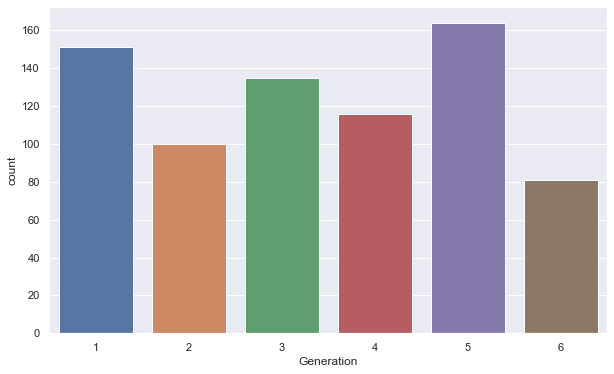

In [110]:
#Pokemon in each generation
plt.figure(figsize=(10,6))
sns.countplot(x="Generation", data=pkm_legendaries_df)
plt.show()

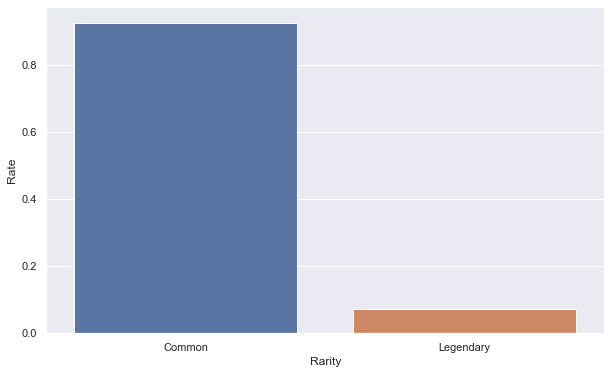

In [118]:
#Legendary Rate
plt.figure(figsize=(10,6))
pkm_legendaries_distr_df = pkm_legendaries_df["Rarity"].value_counts(normalize=True).reset_index().rename(columns={"index": "Rarity", "Rarity":"Rate"})
sns.barplot(y="Rate", x="Rarity", data=pkm_legendaries_distr_df)
plt.show()

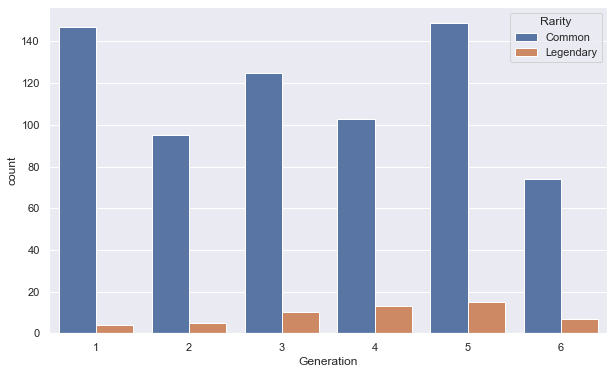

In [119]:
#Pokemon common and legendary in each generation
plt.figure(figsize=(10,6))
sns.countplot(x="Generation", hue="Rarity", data=pkm_legendaries_df)
plt.show()

#Group By?